In [ ]:
!pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.1 MB/s 
     |████████████████████████████████| 13.7 MB 49.6 MB/s 
     |████████████████████████████████| 1.6 MB 76.9 MB/s 
     |████████████████████████████████| 120 kB 83.0 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import re
import csv
import random
import string
import multiprocessing
import itertools
import random
import csv
import statistics
import string
import random
import pennylane as qml
from tensorflow.keras.regularizers import l2

In [ ]:
#S-Box Layer
s_box=[0xC,0x5,0x6,0xB,0x9,0x0,0xA,0xD,0x3,0xE,0xF,0x8,0x4,0x7,0x1,0x2]

# Rotate left: 0b1001 --> 0b0011
rol = lambda val, r_bits, max_bits: \
    (val << r_bits%max_bits) & (2**max_bits-1) | \
    ((val & (2**max_bits-1)) >> (max_bits-(r_bits%max_bits)))

# Rotate right: 0b1001 --> 0b1100
ror = lambda val, r_bits, max_bits: \
    ((val & (2**max_bits-1)) >> r_bits%max_bits) | \
    (val << (max_bits-(r_bits%max_bits)) & (2**max_bits-1))

# s-present는 Present의 키스케줄링 동일. 오른쪽 4n bit로만 구성
def genRoundKeys(key, rounds=32):
    roundkeys = []
    for i in range(1,rounds+1): # (K1 ... K32)
        # rawkey: used in comments to show what happens at bitlevel
        # rawKey[0:64]
        roundkeys.append(key >>16)
        #1. Shift
        #rawKey[19:len(rawKey)]+rawKey[0:19]
        key = ((key & (2**19-1)) << 61) + (key >> 19)
        #2. SBox
        #rawKey[76:80] = S(rawKey[76:80])
        key = (s_box[key >> 76] << 76)+(key & (2**76-1))
        #3. Salt
        #rawKey[15:20] ^ i
        key ^= i << 15

    return roundkeys

#############################################

import numpy as np

def Sbox(x):
    
    temp_lsb = x & 0b1111
    temp_x = (x & 0b0000000011110000) >> 4
    temp_y = (x & 0b0000111100000000) >> 8
    temp_msb = x >> 12

    table = [0xc, 0x5, 0x6, 0xb, 0x9, 0x00, 0xa, 0xd, 0x3, 0xe, 0xf, 0x8, 0x4, 0x7, 0x1, 0x2]
    
    temp_lsb = table[temp_lsb]
    temp_x = table[temp_x]
    temp_y = table[temp_y]
    temp_msb = table[temp_msb]

    temp1_x = [0,0,0,0]
    temp1_y = [0,0,0,0]
    temp1_msb = [0,0,0,0]
    
    temp1_x[0] = (temp_x & 0b0001)
    temp1_x[1] = (temp_x & 0b0010) >> 1
    temp1_x[2] = (temp_x & 0b0100) >> 2
    temp1_x[3] = (temp_x & 0b1000) >> 3

    temp1_y[0] = (temp_y & 0b0001)
    temp1_y[1] = (temp_y & 0b0010) >> 1
    temp1_y[2] = (temp_y & 0b0100) >> 2
    temp1_y[3] = (temp_y & 0b1000) >> 3

    temp1_msb[0] = (temp_msb & 0b0001)
    temp1_msb[1] = (temp_msb & 0b0010) >> 1
    temp1_msb[2] = (temp_msb & 0b0100) >> 2
    temp1_msb[3] = (temp_msb & 0b1000) >> 3

    result = temp_lsb + temp1_x[0] * 16 +  temp1_x[1] * 32 + temp1_x[2] * 64 + temp1_x[3] * 128 + temp1_y[0] * 256 +  temp1_y[1] * 512 + temp1_y[2] * 1024 + temp1_y[3] * 2048 + temp1_msb[0] * 4096 +  temp1_msb[1] * 8192 + temp1_msb[2] * 16384 + temp1_msb[3] * 32768

    return result

def Permutation(x):

    # n=4 : 15 11 7 3 14 10 6 2 13 9 5 1 12 8 4 0

    # n=2 : 73625140

    temp = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    temp[0] = x & 0b0001
    temp[1] = (x & 0b0010) >> 1
    temp[2] = (x & 0b0100) >> 2
    temp[3] = (x & 0b1000) >> 3

    temp[4] = (x & 0b00010000) >> 4
    temp[5] = (x & 0b00100000) >> 5
    temp[6] = (x & 0b01000000) >> 6
    temp[7] = (x & 0b10000000) >> 7

    temp[8] = (x & 0b000100000000) >> 8
    temp[9] = (x & 0b001000000000) >> 9
    temp[10] = (x & 0b010000000000) >> 10
    temp[11] = (x & 0b100000000000) >> 11

    temp[12] = (x & 0b0001000000000000) >> 12
    temp[13] = (x & 0b0010000000000000) >> 13
    temp[14] = (x & 0b0100000000000000) >> 14
    temp[15] = (x & 0b1000000000000000) >> 15

    result = 0
    result = result + temp[0]
    result = result + temp[4] * 2
    result = result + temp[8] * 4
    result = result + temp[12] * 8
    result = result + temp[1] * 16
    result = result + temp[5] * 32
    result = result + temp[9] * 64
    result = result + temp[13] * 128

    result = result + temp[2] * 256
    result = result + temp[6] * 512
    result = result + temp[10] * 1024
    result = result + temp[14] * 2048
    result = result + temp[3] * 4096
    result = result + temp[7] * 8192
    result = result + temp[11] * 16384
    result = result + temp[15] * 32768

    return result

def Present(pt, key, rounds):
    roundkeys = genRoundKeys(key, rounds)
    s_rnd = []

    n=4
    
    for rnd in range(len(roundkeys)):         
        short = int(bin(roundkeys[rnd])[-4*n:],2)
        s_rnd.append(short)

    for i in range(rounds-1):
        pt = pt ^ s_rnd[i]#s_rnd[i] #key
        pt = Sbox(pt)
        pt = Permutation(pt)
    ct = pt ^ s_rnd[-1] #

    return ct

In [ ]:
import numpy as np
from os import urandom
import numpy as np
from os import urandom
import random

# 8pt -> 16pt

#convert_to_binary takes as input an array of ciphertext pairs
#where the first row of the array contains the lefthand side of the ciphertexts,
#the second row contains the righthand side of the ciphertexts,
#the third row contains the lefthand side of the second ciphertexts,
#and so on
#it returns an array of bit vectors containing the same data

def WORD_SIZE():
    return(8);

'''
def ALPHA():
    return(7);

def BETA():
    return(2);
'''

def convert_to_binary(arr):
  X = np.zeros((4 * WORD_SIZE(),len(arr[0])),dtype=np.uint8);
  for i in range(4 * WORD_SIZE()):
    index = i // WORD_SIZE();
    offset = WORD_SIZE() - (i % WORD_SIZE()) - 1;
    X[i] = (arr[index] >> offset) & 1;
  X = X.transpose();
  return(X);

#takes a text file that contains encrypted block0, block1, true diff prob, real or random
#data samples are line separated, the above items whitespace-separated
#returns train data, ground truth, optimal ddt prediction
def readcsv(datei):
    data = np.genfromtxt(datei, delimiter=' ', converters={x: lambda s: int(s,16) for x in range(2)});
    X0 = [data[i][0] for i in range(len(data))];
    X1 = [data[i][1] for i in range(len(data))];
    Y = [data[i][3] for i in range(len(data))];
    Z = [data[i][2] for i in range(len(data))];
    ct0a = [X0[i] >> 16 for i in range(len(data))];
    ct1a = [X0[i] & MASK_VAL for i in range(len(data))];
    ct0b = [X1[i] >> 16 for i in range(len(data))];
    ct1b = [X1[i] & MASK_VAL for i in range(len(data))];
    ct0a = np.array(ct0a, dtype=np.uint16); ct1a = np.array(ct1a,dtype=np.uint16);
    ct0b = np.array(ct0b, dtype=np.uint16); ct1b = np.array(ct1b, dtype=np.uint16);
    
    #X = [[X0[i] >> 16, X0[i] & 0xffff, X1[i] >> 16, X1[i] & 0xffff] for i in range(len(data))];
    X = convert_to_binary([ct0a, ct1a, ct0b, ct1b]); 
    Y = np.array(Y, dtype=np.uint8); Z = np.array(Z);
    return(X,Y,Z);

#baseline training data generator
def make_train_data(n, nr, diff=(0x00,0x07)):


  plain0l = np.zeros(shape=(n,),dtype=int)
  plain0r = np.zeros(shape=(n,),dtype=int)
  plain1l = np.zeros(shape=(n,),dtype=int)
  plain1r = np.zeros(shape=(n,),dtype=int)

  '''
  plain = random.randint(0, 255)
  masterkey = random.randint(0, 127)
  cipher = Present(plain, masterkey, rounds)
  '''

  for i in range(n):
    plain0l[i] = random.randint(0, 255) # 8-bit
    plain0r[i] = random.randint(0, 255) # 8-bit

    plain1l[i] = plain0l[i] ^ diff[0];
    plain1r[i] = plain0r[i] ^ diff[1];

  Y = np.ones(shape=(n,)) # cipher

  for i in range(int(n/2)):
    plain1l[i] = random.randint(0, 255)
    plain1r[i] = random.randint(0, 255)
    Y[i] = 0 # random 

  plain0 = np.zeros(shape=(n,),dtype=int)
  plain1 = np.zeros(shape=(n,),dtype=int)
  ctdata0 = np.zeros(shape=(n,),dtype=int)
  ctdata1 = np.zeros(shape=(n,),dtype=int)

  ctdata0r = np.zeros(shape=(n,),dtype=int)
  ctdata0l = np.zeros(shape=(n,),dtype=int)
  ctdata1r = np.zeros(shape=(n,),dtype=int)
  ctdata1l = np.zeros(shape=(n,),dtype=int)
  
  for i in range(n):

    plain0[i] = int(256*(plain0l[i]) + plain0r[i]) 
    plain1[i] = int(256*(plain1l[i]) + plain1r[i])

    ks = random.randint(0, 65535)
    ctdata0[i] = Present(plain0[i], ks, nr)
    ctdata1[i] = Present(plain1[i], ks, nr)

    ctdata0r[i] = ctdata0[i] % 256
    ctdata0l[i] = ctdata0[i] >> 8

    ctdata1r[i] = ctdata1[i] % 256
    ctdata1l[i] = ctdata1[i] >> 8

  X = convert_to_binary([ctdata0l, ctdata0r, ctdata1l, ctdata1r]); 

  return(X,Y);

In [ ]:
num_rounds=3
x_train, y_train = make_train_data(7000,num_rounds); #10**7
x_val, y_val = make_train_data(1900,num_rounds); # 500~1000
x_test, y_test = make_train_data(100,num_rounds); #10**7

x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_test = np.asarray(x_test)

y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)


y_train = y_train.reshape((len(y_train),1))
y_val = y_val.reshape((len(y_val),1))
y_test = y_test.reshape((len(y_test),1))

Random + Amplitude

In [ ]:
import pennylane as qml
from pennylane import numpy as np

n_qubits = 4

#dev = qml.device("default.qubit", wires=n_qubits)
dev = qml.device('lightning.qubit', wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    #qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0, normalize=True)
    qml.RandomLayers(weights=weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

Strong

In [ ]:
n_qubits = 4
#dev = qml.device('default.mixed', wires=n_qubits)

#dev = qml.device("default.qubit", wires=n_qubits)

dev = qml.device("lightning.qubit", wires=n_qubits)

@qml.qnode(dev) # , interface="tf", diff_method="backprop 
def qnode(inputs, weights):
    #qml.AmplitudeEmbedding(inputs, wires=range(n_qubits), pad_with=0, normalize=True)
    qml.StronglyEntanglingLayers(weights=weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [ ]:
n_layers = 10 # 10으로해서 해보기. 
weight_shapes = {"weights": (n_layers, n_qubits)} #,3
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

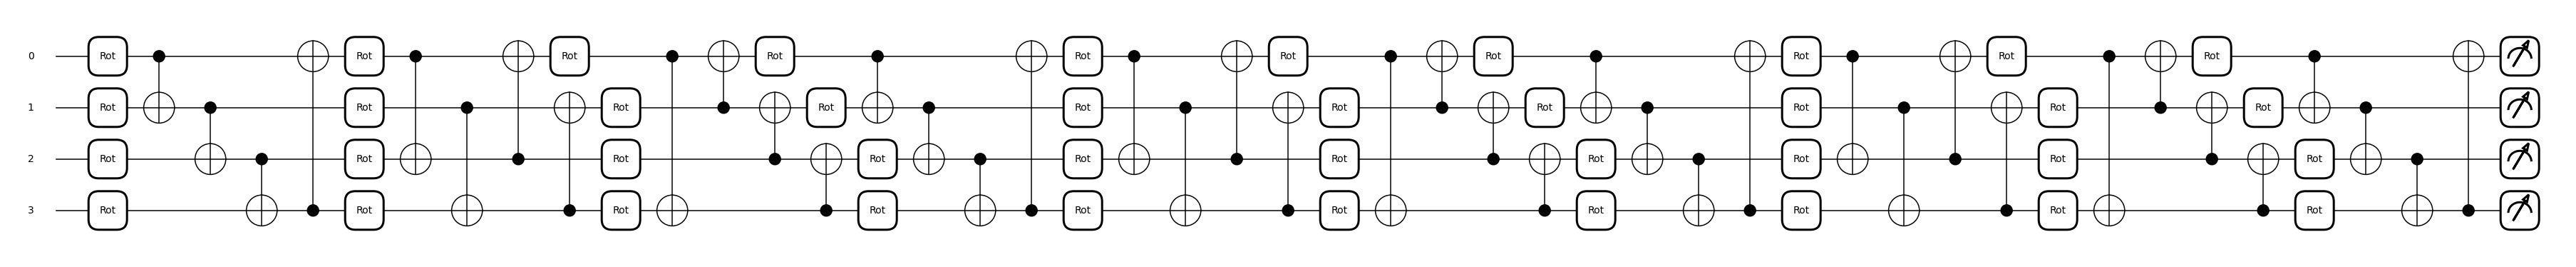

In [ ]:
qml.drawer.use_style('black_white')
w = np.ones((n_layers, n_qubits,3))
inputssss = np.ones((32,16,3))
fig, ax = qml.draw_mpl(qnode)(inputssss,w)
fig.show()

In [ ]:
# re-define the layers
clayer_1 = tf.keras.layers.Dense(256, activation = 'relu',kernel_regularizer=l2(0.001))
clayer_2 = tf.keras.layers.Dense(256)
clayer_3 = tf.keras.layers.Dense(64)
# qubit 수 * 양자회로 수 는 맞아야 함

inp = tf.keras.layers.Input(shape=(32, ))

q1 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q2 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q3 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
q4 = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

output_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')

# construct the model
inputs = tf.keras.Input(shape=(32,))
x = clayer_1(inputs)
#x = clayer_2(x)
x = clayer_3(x)
x1, x2, x3, x4 = tf.split(x, 4, axis=1)

x1 = q1(x1)
x2 = q2(x2)
x3 = q3(x3)
x4 = q4(x4)

x = tf.concat([x1,x2,x3,x4], axis=1)
outputs = output_layer(x)

q1.build((32,16))
q2.build((32,16))
q3.build((32,16))
q4.build((32,16))

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model. summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          8448        ['input_2[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 64)           16448       ['dense[0][0]']                  
                                                                                                  
 tf.split (TFOpLambda)          [(None, 16),         0           ['dense_2[0][0]']                
                                 (None, 16),                                                  

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss="binary_crossentropy", metrics=["acc"])

In [ ]:
fitting = model.fit(x_train, y_train, epochs=15, batch_size=8, validation_data = (x_val, y_val), verbose=2)

In [ ]:
predicted_labels = model.predict(np.array(x_test))

res = np.array(predicted_labels > 0.5, dtype = int)

res = res.reshape((len(x_test)))
y_test = y_test.reshape((len(y_test)))

total = 0

for i in range(len(res)):
    if res[i] == y_test[i]:
        total += 1

print(total/len(x_test))
